# Kernel SVM
-----

<div class="table-of-contents" style="background-color:#433878; padding: 20px; margin: 10px; font-size: 110%; border-radius: 25px; box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);">
    <p><a class='anchor' id='top' style="color: #EEEEEE">Table of contents:</a></p>
  <ul>
    <li style="color: #493628"><a href="#1" style="color: #EEEEEE">Importing the libraries </a></li>
    <li style="color: #493628"><a href="#2" style="color: #EEEEEE">Importing the dataset</a></li>
    <li style="color: #493628"><a href="#3" style="color: #EEEEEE">Data analysis</a></li>
    <li style="color: #493628"><a href="#4" style="color: #EEEEEE">Split the dataset into dependent/independent variables</a></li>
    <li style="color: #493628"><a href="#5" style="color: #EEEEEE">Data Preprocessing</a></li>
    <li style="color: #493628"><a href="#6" style="color: #EEEEEE">Spliting the dataset into thetraining set and test set</a></li> 
    <li style="color: #493628"><a href="#7" style="color: #EEEEEE">Run SVM with default hyperparameters</a></li>
    <li style="color: #493628"><a href="#8" style="color: #EEEEEE">Run SVM with linear kernel</a></li>  
    <li style="color: #493628"><a href="#9" style="color: #EEEEEE">Run SVM with polynomial kernel </a></li>  
    <li style="color: #493628"><a href="#10" style="color: #EEEEEE">Run SVM with sigmoid kernel  </a></li>   
    <li style="color: #493628"><a href="#11" style="color: #EEEEEE">Sources</a></li>  
  </ul>
</div>


## Step 1: <span id="1" style="color: #4A628A">Importing the libraries 📚 </span>[🔝](#top)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### For hide all warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Step 2: <span id="2" style="color: #4A628A">Importing the dataset 📥 </span>[🔝](#top)

In [3]:
dataset = pd.read_csv("pulsar_stars.csv")

### Data Shape and information

In [4]:
print (f"Shape of data {dataset.shape}")
print (f"Number of rows: {dataset.shape [0]}")
print (f"Number of columns: {dataset.shape [1]}")

Shape of data (17898, 9)
Number of rows: 17898
Number of columns: 9


In [5]:
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [6]:
dataset.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
17893,136.429688,59.847421,-0.187846,-0.738123,1.296823,12.166062,15.450260,285.931022,0
17894,122.554688,49.485605,0.127978,0.323061,16.409699,44.626893,2.945244,8.297092,0
17895,119.335938,59.935939,0.159363,-0.743025,21.430602,58.872000,2.499517,4.595173,0
17896,114.507812,53.902400,0.201161,-0.024789,1.946488,13.381731,10.007967,134.238910,0
17897,57.062500,85.797340,1.406391,0.089520,188.306020,64.712562,-1.597527,1.429475,0


## Step 3: <span id="3" style="color: #4A628A">Data analysis ⚙️ </span>[🔝](#top)

In [7]:
# To analyze descriptive statistics of data
dataset.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [9]:
dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

<Axes: >

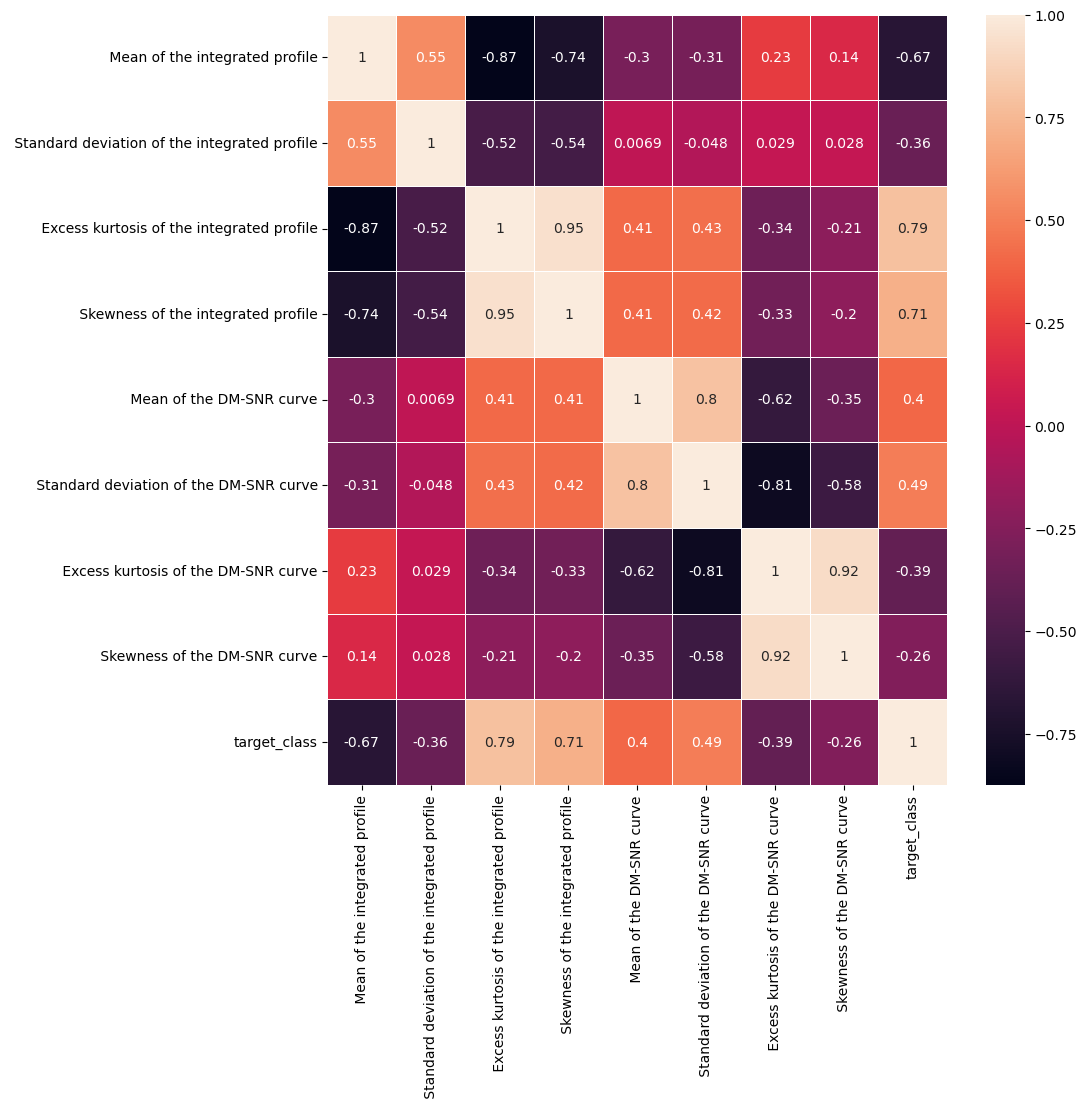

In [10]:
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(dataset.corr(),annot=True, linewidth=.5, ax=ax)

## Step 4: <span id="4" style="color: #4A628A">Split the dataset into dependent/independent variables ✂️ </span>[🔝](#top)

In [11]:
# independent variables
x = dataset.iloc[:,0:-1].values
# dependent variables
y = dataset.iloc[:,-1].values

y = y.reshape(len(y),1)

## Step 5: <span id="5" style="color: #4A628A">Spliting the dataset into thetraining set and test set 🗃️ </span>[🔝](#top)

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,
                                                   random_state=0)

## Step 6: <span id="6" style="color: #4A628A">Feature Scaling ✨ </span>[🔝](#top)

In [13]:
# Feature Scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train[:,:] = sc.fit_transform(x_train[:,:])
x_test[:,:] = sc.transform(x_test[:,:])

## Step 7: <span id="7" style="color: #4A628A">Run SVM with default hyperparameters 🛠️ </span>[🔝](#top)

In [14]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state=0, max_iter=1000)
classifier.fit(x_train, y_train)

SVC(max_iter=1000, random_state=0)

### <span  style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [15]:
y_pred = classifier.predict(x_test)

### <span style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

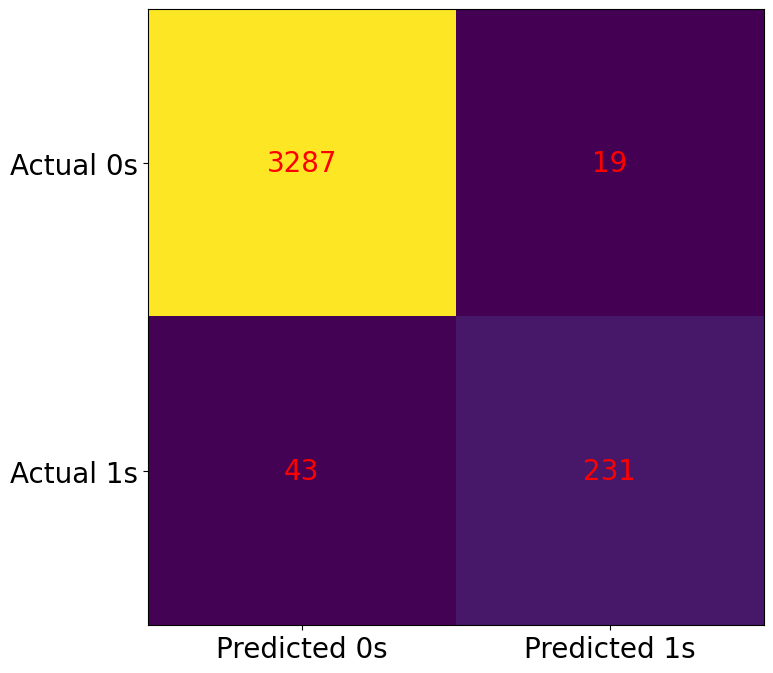

In [16]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

### <span style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [17]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9826815642458101


## Step 8: <span id="8" style="color: #4A628A">Run SVM with linear kernel 🛠️ </span>[🔝](#top)

In [18]:
from sklearn.svm import SVC
classifier = SVC(kernel='linear', random_state=0, max_iter=100000)
classifier.fit(x_train, y_train)

SVC(kernel='linear', max_iter=100000, random_state=0)

### <span style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [19]:
y_pred = classifier.predict(x_test)

### <span style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

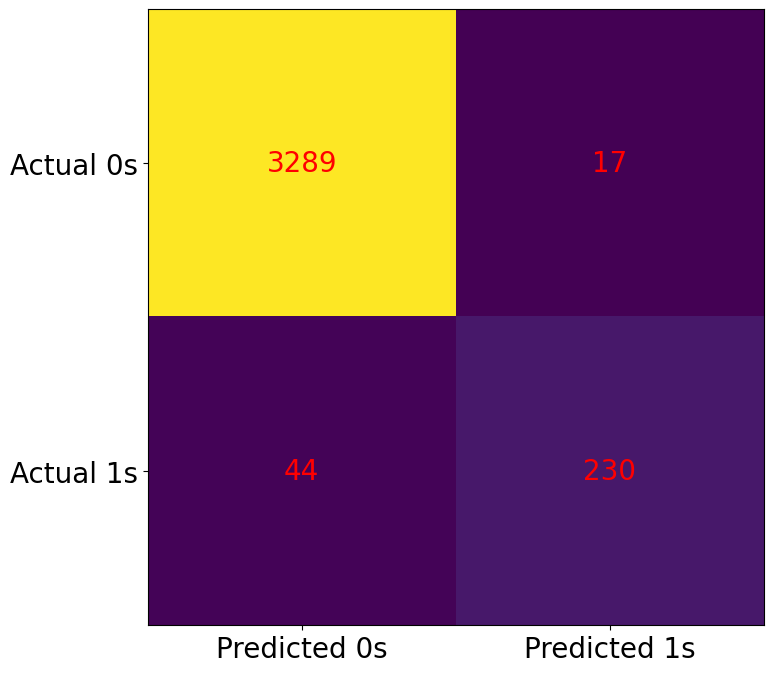

In [20]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

### <span style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [21]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9829608938547486


## Step 9: <span id="9" style="color: #4A628A">Run SVM with polynomial kernel 🛠️ </span>[🔝](#top)

In [22]:
from sklearn.svm import SVC
classifier = SVC(kernel='poly', random_state=0, max_iter=100000)
classifier.fit(x_train, y_train)

SVC(kernel='poly', max_iter=100000, random_state=0)

### <span style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [23]:
y_pred = classifier.predict(x_test)

### <span style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

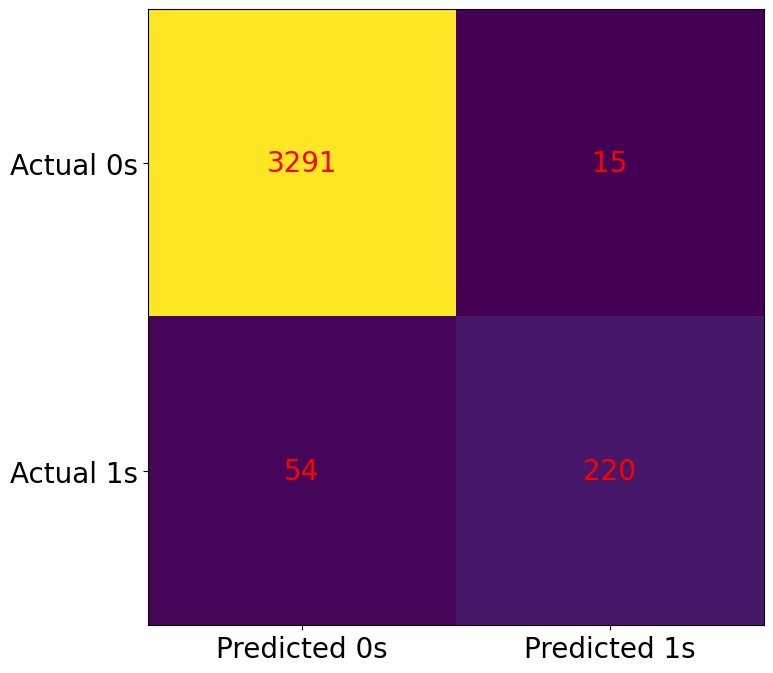

In [24]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

### <span style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [25]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.9807262569832402


## Step 10: <span id="10" style="color: #4A628A">Run SVM with sigmoid kernel 🛠️ </span>[🔝](#top)

In [26]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid', random_state=0, max_iter=100000)
classifier.fit(x_train, y_train)

SVC(kernel='sigmoid', max_iter=100000, random_state=0)

### <span style="color: #4A628A">Predicting The Test set results 🎯 </span>[🔝](#top)

In [27]:
y_pred = classifier.predict(x_test)

### <span style="color: #4A628A">Plotting the Confusion Matrix for Classification Results 🌟 </span>[🔝](#top)

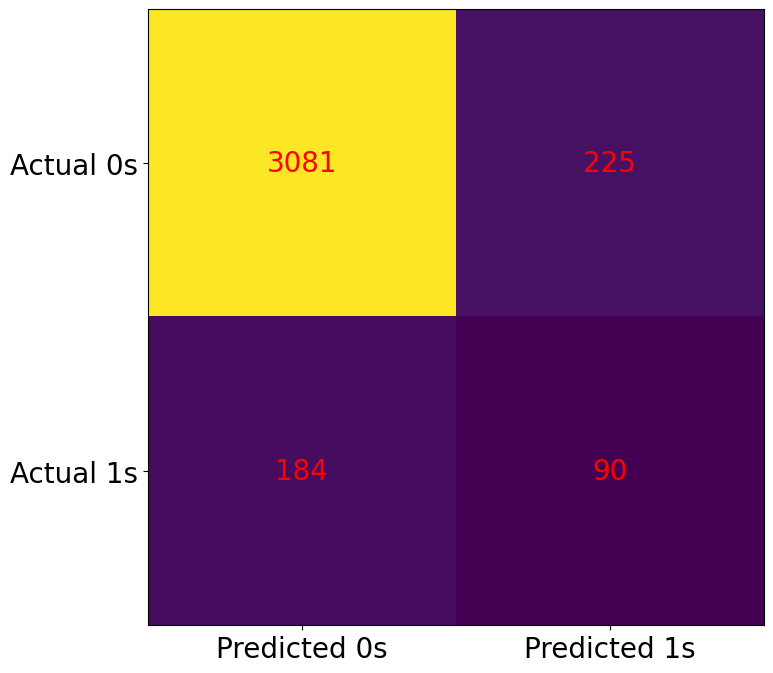

In [28]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test , y_pred)

# Create figure and axes for the plot
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(conf_matrix)
ax.grid(False)

# Set labels for the axes
ax.xaxis.set(ticks=(0, 1), ticklabels=("Predicted 0s", "Predicted 1s"))
ax.yaxis.set(ticks=(0, 1), ticklabels=("Actual 0s", "Actual 1s"))

# Customize the tick label font size
ax.tick_params(axis='both', which='major', labelsize=20)

# Set limits for the vertical axis
ax.set_ylim(1.5, -0.5)

# Add text annotations in each cell of the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, conf_matrix[i, j], ha="center", va="center", color="red", fontsize=20)

plt.show()

### <span style="color: #4A628A">Calculating and Printing the Accuracy Score 🚀 </span>[🔝](#top)

In [29]:
from sklearn.metrics import accuracy_score

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

print(accuracy)

0.8857541899441341


## <a id="11">Sources 📝</a>:<a class='anchor' id='images'></a> [🔝](#top)
----
- scikit-learn.org : https://scikit-learn.org/dev/modules/generated/sklearn.svm.SVC.html
- kaggle : https://www.kaggle.com/datasets/pierlucaanania/pulsar-stars
- Machine Learning A-Z: AI, Python & R + ChatGPT Prize [2024] : https://www.udemy.com/course/machinelearning/?couponCode=2021PM20